<a href="https://colab.research.google.com/github/jon-chun/sentimentarcs/blob/main/sa_scikit_imdb_20210915.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMDB Sentiment Analysis with Scikit-Learn**

Jon Chun
15 Sep 2021

* https://colab.research.google.com/github/chengjun/mybook/blob/main/11-4-sentiment-classifier.ipynb#scrollTo=c749tKCSZpbw


# 基于机器学习的情感分析


![image.png](https://github.com/chengjun/mybook/blob/main/images/author.png?raw=1)

<div><img src="https://github.com/chengjun/mybook/blob/main/images/emotion.png?raw=1" align="right"></div>

## Emotion
Different types of emotion: anger, disgust, fear, joy, sadness, and surprise. The classification can be performed using different algorithms: e.g., naive Bayes classiﬁer trained on Carlo Strapparava and Alessandro Valitutti’s emotions lexicon.


## Polarity

To classify some text as positive or negative. In this case, the classification can be done by using a naive Bayes algorithm trained on Janyce Wiebe’s subjectivity lexicon.

![image.png](https://github.com/chengjun/mybook/blob/main/images/tweet.png?raw=1)

## Sentiment Analysis with Sklearn


# **Install and Load Libraries**

In [1]:
# [RESTART RUNTIME] Required

!pip install turicreate

     |████████████████████████████████| 92.0 MB 8.3 kB/s 
     |████████████████████████████████| 86.4 MB 35 kB/s 
     |████████████████████████████████| 3.5 MB 23.9 MB/s 
     |████████████████████████████████| 322 kB 39.6 MB/s 
     |████████████████████████████████| 3.6 MB 44.6 MB/s 
     |████████████████████████████████| 18.3 MB 143 kB/s 
     |████████████████████████████████| 449 kB 58.9 MB/s 
     |████████████████████████████████| 50 kB 6.5 MB/s 
     |████████████████████████████████| 3.8 MB 54.4 MB/s 
     |████████████████████████████████| 2.9 MB 63.8 MB/s 
     |████████████████████████████████| 20.1 MB 257 kB/s 
  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13714 sha256=4810cc5d931e72b5e3912146aab783c203071195d5b797cfff760b55b7f34894
  Stored in directory: /root/.cache/pip/wheels/b2/7f/f6/f180315b584f00445045ff1699b550fa895d09471337ce21c6
  Created wheel for resampy: filename=resampy-0.2.1-py3-none-any.whl size=320860 sha256=ebeb360395

In [3]:
!pip install texthero

In [9]:
import texthero as hero

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [5]:
import os
import sys
import io
import glob

import re
import string

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB

In [8]:
from nltk.stem.porter import PorterStemmer

porter=PorterStemmer()

# **Configure Jupyter**

In [10]:
# Configure Jupyter

# Enable multiple outputs from one code cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display
from ipywidgets import widgets, interactive

# Configure Google Colab

# %load_ext google.colab.data_table

In [11]:
# Text wrap

from IPython.display import HTML

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)


# **Connect to gDrive**

In [4]:
# Connect to Google gDrive

# Flag to indicate first run through code 
flag_first_run = True

from google.colab import drive, files
drive.mount('/gdrive')
%cd /gdrive/MyDrive/

Mounted at /gdrive
/gdrive/MyDrive


In [5]:
%cd ./research/2021/sa_book_code/books_sa/

/gdrive/MyDrive/research/2021/sa_book_code/books_sa


In [2]:
!ls

sample_data


# **Custom Functions**

In [95]:
# https://www.kaggle.com/aditya6040/7-models-on-imdb-dataset-best-score-88-2/notebook

def get_metrics(model,x,y):
    y_pred = model.predict(x)
    acc = accuracy_score(y, y_pred)
    f1=f1_score(y, y_pred)
    cm=confusion_matrix(y, y_pred)
    report=classification_report(y,y_pred)
    plt.figure(figsize=(4,4))
    sns.heatmap(cm,annot=True,cmap='Blues',xticklabels=[0,1],fmt='d',annot_kws={"fontsize":19})
    plt.xlabel("Predicted",fontsize=16)
    plt.ylabel("Actual",fontsize=16)
    plt.show()
    print("\nAccuracy: ",round(acc,2))
    print("\nF1 Score: ",round(f1,2))
#     print("\nConfusion Matrix: \n",cm)
    print("\nReport:",report)

# **Get Corpora**

In [67]:
%whos list

Variable                Type    Data/Info
-----------------------------------------
corpora_ls              list    n=25
groups_ls               list    n=4
models_baseline_ls      list    n=12
models_dnn              list    n=4
models_ml               list    n=5
models_sentimentr_ls    list    n=7
models_supervised_ls    list    n=5
models_syuzhetr_ls      list    n=4
models_transformer_ls   list    n=8


In [7]:
# List of Corpora

corpora_ls = ['cdickens_achristmascarol',
              'cdickens_greatexpectations',
              'ddefoe_robinsoncrusoe',
              'emforster_howardsend',
              'fbaum_thewonderfulwizardofoz',
              'fdouglass_narrativelifeofaslave',
              'fscottfitzgerald_thegreatgatsby',
              'geliot_middlemarch',
              'hjames_portraitofalady',
              'homer-ewilson_odyssey',
              'imcewan_machineslikeme',
              'jausten_prideandprejudice', # missing RoBERTaXML8lang
              'jconrad_heartofdarkness',
              'jjoyce_portraitoftheartist',
              'jkrowling_1sorcerersstone',  
              'mproust-mtreharne_3guermantesway', # missing all Transformers
              'mshelley_frankenstein',
              'mtwain_huckleberryfinn',
              'staugustine_confessions9end',
              'tmorrison_beloved',
              'vnabokov_palefire',
              'vwoolf_mrsdalloway',
              'vwoolf_orlando',
              'vwoolf_thewaves',
              'vwoolf_tothelighthouse']

In [8]:
# Taxonomy of Models 

groups_ls = ['models_baseline_ls',
                'models_sentimentr_ls',
                'models_syuzhetr_ls',
                'models_transformer_ls']

# Could add suffix '_sst2' if classifiers trained on SST2 (currently requires 30m on Colab Pro/GPU+RAM)
models_supervised_ls = ['linreg_imdb50k',
                   'svc_imdb50k',
                   'logreg_imdb50k',
                   'dforest_imdb50k',
                   'multinb_imdb50k']

models_baseline_ls = ['sentimentr',
                      'syuzhet',
                      'bing',
                      'sentiword',
                      'senticnet',
                      'nrc',
                      'afinn',
                      'vader',
                      'textblob',
                      'flair',
                      'pattern',
                      'stanza']

models_sentimentr_ls = ['jockers_rinker',
                        'jockers',
                        'huliu',
                        'senticnet',
                        'sentiword',
                        'nrc',
                        'lmcd']

models_syuzhetr_ls = ['syuzhet',
                      'bing',
                      'afinn',
                      'nrc']

models_transformer_ls = ['roberta15lg', 
                         'nlptown', 
                         'yelp', 
                         'hinglish',
                         'imdb2way', 
                         'huggingface', 
                         't5imdb50k', 
                         'robertaxml8lang']

models_ml = ['multinomialnb',
             'logisticreg',
             'svm',
             'dt',
             'xgboost']
             
models_dnn = ['fcn',
              'rnn',
              'lstm',
              'cnn']

# Temporarily redefine from English to French Transformer Models
# models_transformer_ls = ['flaubert', 'nlptown', 'robertaxml8lang']

In [9]:
corpora_ls[0]

'cdickens_achristmascarol'

In [10]:
!pwd

/gdrive/MyDrive/research/2021/sa_book_code/books_sa


In [11]:
corpus_name = corpora_ls[0]

!ls -altr $corpus_name

total 7991
-rw------- 1 root root  161608 Sep 16 22:42 cdickens_achristmascarol.txt
-rw------- 1 root root  199702 Sep 17 02:48 sum_sentiments_syuzhetR_4models_cdickens_achristmascarol.csv
-rw------- 1 root root  306714 Sep 17 02:48 sum_sentiments_sentimentR_7models_cdickens_achristmascarol.csv
-rw------- 1 root root  166558 Sep 17 03:15 corpus_text_sents_raw_cdickens_achristmascarol.csv
-rw------- 1 root root  156712 Sep 17 03:15 corpus_text_sents_clean_cdickens_achristmascarol.csv
-rw------- 1 root root 1117507 Sep 17 03:15 sum_sentiments_sents_syuzhetr_cdickens_achristmascarol.csv
-rw------- 1 root root 1548322 Sep 17 03:15 sum_sentiments_sents_sentimentr_cdickens_achristmascarol.csv
-rw------- 1 root root 2419706 Sep 17 03:15 corpus_sents_baseline_cdickens_achristmascarol.csv
-rw------- 1 root root  315351 Sep 17 03:15 corpus_sects_baseline_cdickens_achristmascarol.csv
-rw------- 1 root root 1107182 Sep 17 03:15 corpus_parags_baseline_cdickens_achristmascarol.csv
-rw------- 1 root 

In [12]:
temp_df = pd.read_csv(f'./{corpus_name}/corpus_text_sents_clean_{corpus_name}.csv')
temp_df.rename(columns={'Unnamed: 0':'sent_no'}, inplace=True)
temp_df['sent_clean'] = temp_df['sent_clean'].astype('string')
temp_df.head()

,sent_no,sent_clean
0,0,marley own ghost
1,1,marley was dead to begin with
2,2,there is no doubt whatever about that
3,3,the register of his burial was signed by the c...
4,4,scrooge signed it and scrooge own name was goo...


In [13]:
temp_df = f'./{corpora_ls[0]}/'

In [68]:
# Get a Dictionary of clean text for every item in the corpora (listed in corpora_ls)

corpora_dt = {}
for i, acorpus in enumerate(corpora_ls):
  print(f'\nREADING #{i}: {acorpus}\n========================================\n')
  # os.listdir(adir)
  corpus_csv = f'./{acorpus}/corpus_text_sents_clean_{acorpus}.csv'
  print(f'{os.getcwd()}\n     {corpus_csv}')
  temp_df = pd.DataFrame()
  temp_df = pd.read_csv(corpus_csv, encoding='ISO-8859–1')
  temp_df.rename(columns={'Unnamed: 0':'sent_no'}, inplace=True)
  temp_df['sent_clean'] = temp_df['sent_clean'].astype('string')
  corpora_dt[acorpus] = temp_df


READING #0: cdickens_achristmascarol

/gdrive/My Drive/research/2021/sa_book_code/books_sa
     ./cdickens_achristmascarol/corpus_text_sents_clean_cdickens_achristmascarol.csv

READING #1: cdickens_greatexpectations

/gdrive/My Drive/research/2021/sa_book_code/books_sa
     ./cdickens_greatexpectations/corpus_text_sents_clean_cdickens_greatexpectations.csv

READING #2: ddefoe_robinsoncrusoe

/gdrive/My Drive/research/2021/sa_book_code/books_sa
     ./ddefoe_robinsoncrusoe/corpus_text_sents_clean_ddefoe_robinsoncrusoe.csv

READING #3: emforster_howardsend

/gdrive/My Drive/research/2021/sa_book_code/books_sa
     ./emforster_howardsend/corpus_text_sents_clean_emforster_howardsend.csv

READING #4: fbaum_thewonderfulwizardofoz

/gdrive/My Drive/research/2021/sa_book_code/books_sa
     ./fbaum_thewonderfulwizardofoz/corpus_text_sents_clean_fbaum_thewonderfulwizardofoz.csv

READING #5: fdouglass_narrativelifeofaslave

/gdrive/My Drive/research/2021/sa_book_code/books_sa
     ./fdouglass_na

In [69]:
len(corpora_dt.keys())

25

In [70]:
[f'{corpus_name}' for corpus_name in corpora_dt.keys()]

['cdickens_achristmascarol',
 'cdickens_greatexpectations',
 'ddefoe_robinsoncrusoe',
 'emforster_howardsend',
 'fbaum_thewonderfulwizardofoz',
 'fdouglass_narrativelifeofaslave',
 'fscottfitzgerald_thegreatgatsby',
 'geliot_middlemarch',
 'hjames_portraitofalady',
 'homer-ewilson_odyssey',
 'imcewan_machineslikeme',
 'jausten_prideandprejudice',
 'jconrad_heartofdarkness',
 'jjoyce_portraitoftheartist',
 'jkrowling_1sorcerersstone',
 'mproust-mtreharne_3guermantesway',
 'mshelley_frankenstein',
 'mtwain_huckleberryfinn',
 'staugustine_confessions9end',
 'tmorrison_beloved',
 'vnabokov_palefire',
 'vwoolf_mrsdalloway',
 'vwoolf_orlando',
 'vwoolf_thewaves',
 'vwoolf_tothelighthouse']

In [71]:
corpora_dt['cdickens_achristmascarol'].head()

,sent_no,sent_clean
0,0,marley own ghost
1,1,marley was dead to begin with
2,2,there is no doubt whatever about that
3,3,the register of his burial was signed by the c...
4,4,scrooge signed it and scrooge own name was goo...


In [72]:
corpora_dt['cdickens_achristmascarol'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sent_no     1399 non-null   int64 
 1   sent_clean  1399 non-null   string
dtypes: int64(1), string(1)
memory usage: 22.0 KB


In [73]:
corpora_dt['cdickens_achristmascarol'].shape

(1399, 2)

# **IMDB Dataset**

In [25]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [26]:
# Create expected subdirectory for kaggle.json
# NOTE: may already exist (if so, continue to next step)

!mkdir /root/.kaggle


In [27]:
# Move auth file kaggle.json to expected subdirectory

!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [28]:
# Option #3 : Read Dataset from Kaggle in [*.csv format]

# NOTE: Kaggle API periodically expires and must be renewed

!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

!unzip imdb-dataset-of-50k-movie-reviews.zip

!ls

imdb-dataset-of-50k-movie-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  imdb-dataset-of-50k-movie-reviews.zip
replace IMDB Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: IMDB Dataset.csv        
 books_raw
 cardiffnlp
 cdickens_achristmascarol
 cdickens_greatexpectations
 ddefoe_robinsoncrusoe
 emforster_howardsend
 fbaum_thewonderfulwizardofoz
 fdouglass_narrativelifeofaslave
 fscottfitzgerald_thegreatgatsby
 geliot_middlemarch
 hjames_portraitofalady
 homer-ewilson_odyssey
 homer_odyssey
 imcewan_machineslikeme
'IMDB Dataset.csv'
 imdb-dataset-of-50k-movie-reviews.zip
 jausten_prideandprejudice
 jconrad_heartofdarkness
 jessie_novels
 jjoyce_portraitoftheartist
 jkrowling_1sorcerersstone
 jkrowlings_harrypotter_old
 lexicons
 mproust-mtreharne_3guermantesway
 mshelley_frankenstein
 mtwain_huckleberryfinn
 nlp_sa_dl_novels.gdoc
 notebooks
 notebooks_dash
 notebooks_nlp
 notebooks_sa
 notebooks_sa_utils
 note

In [42]:
!pwd

/gdrive/My Drive/research/2021/sa_book_code/books_sa


In [74]:
# Read *.csv file into DataFrame

training_df = pd.read_csv("IMDB Dataset.csv")
training_df["polarity"] = training_df["sentiment"].map({"negative": 0, "positive": 1})
training_df["text_raw"] = training_df["review"].astype('string')
training_df.drop(columns=['review'], inplace=True)
training_df.drop(columns=['sentiment'], inplace=True)
training_df.head()

,polarity,text_raw
0,1,One of the other reviewers has mentioned that ...
1,1,A wonderful little production. <br /><br />The...
2,1,I thought this was a wonderful way to spend ti...
3,0,Basically there's a family where a little boy ...
4,1,"Petter Mattei's ""Love in the Time of Money"" is..."


In [75]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   polarity  50000 non-null  int64 
 1   text_raw  50000 non-null  string
dtypes: int64(1), string(1)
memory usage: 781.4 KB


In [76]:
%%time

# NOTE: 20s on 20210918 at 12:06 with imdb50k

training_df['text_clean'] = hero.clean(training_df['text_raw'])

CPU times: user 21.8 s, sys: 2.34 s, total: 24.2 s
Wall time: 24.1 s


In [77]:
training_df['text_clean'] = training_df['text_clean'].astype('string')
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   polarity    50000 non-null  int64 
 1   text_raw    50000 non-null  string
 2   text_clean  50000 non-null  string
dtypes: int64(1), string(2)
memory usage: 1.1 MB


In [78]:
training_df.head()

,polarity,text_raw,text_clean
0,1,One of the other reviewers has mentioned that ...,one reviewers mentioned watching oz episode ho...
1,1,A wonderful little production. <br /><br />The...,wonderful little production br br filming tech...
2,1,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,0,Basically there's a family where a little boy ...,basically family little boy jake thinks zombie...
4,1,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love time money visually stunnin...


In [79]:
# Check raw Class balance

training_df['polarity'].value_counts()

1    25000
0    25000
Name: polarity, dtype: int64

In [80]:
def clean_dataframe(df_clean):
  '''
  Given a Pandas DataFrame
  Return same DataFrame after dropping duplicate rows and rows with empty values
  '''

  # Check for null values 
  null_values = df_clean.isnull().sum()

  print('Check for null values in DataFrame:')
  print(f'  [{null_values.index[0]}] has {null_values[0]} missing values')
  print(f'  [{null_values.index[1]}] has {null_values[1]} missing values')

  df_clean.dropna(axis=0, inplace=True)
  print('\n')

  # Check for duplicate rows
  print('Check for duplicate rows in DataFrame:')
  num_duplicates = df_clean.duplicated().sum() 

  print(f'  {num_duplicates} duplicate rows\n')

  if num_duplicates > 0:
    # View duplicate reviews
    reviews = df_clean['text_raw']
    dup_reviews = df_clean[reviews.isin(reviews[reviews.duplicated()])].sort_values("text_raw")

    print(f'  First duplicated rows to be dropped:')
    dup_reviews.head()

    #drop duplicate reviews
    print(f'  Original DataFrame: #{df_clean.shape[0]} reviews')
    df_clean.drop_duplicates(inplace = True)
    print(f'                      #{df_clean.shape[0]} reviews after dropping duplicates\n')

  return df_clean

In [81]:
# Drop missing and duplicate rows in DataFrame

training_df = clean_dataframe(training_df)

print(f'DataFrame.shape after cleaning: {training_df.shape}')

Check for null values in DataFrame:
  [polarity] has 0 missing values
  [text_raw] has 0 missing values


Check for duplicate rows in DataFrame:
  418 duplicate rows

  First duplicated rows to be dropped:
  Original DataFrame: #50000 reviews
                      #49582 reviews after dropping duplicates

DataFrame.shape after cleaning: (49582, 3)


In [82]:
training_df.head()

,polarity,text_raw,text_clean
0,1,One of the other reviewers has mentioned that ...,one reviewers mentioned watching oz episode ho...
1,1,A wonderful little production. <br /><br />The...,wonderful little production br br filming tech...
2,1,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,0,Basically there's a family where a little boy ...,basically family little boy jake thinks zombie...
4,1,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love time money visually stunnin...


In [39]:
# Create DataFrames for current model under investigation
#   Separate text features (X) from labels (y)

X = training_df['text_clean']
y = training_df['polarity']
X.shape
print('\n')
y.shape
type(y[0])

numpy.int64

In [43]:
training_df.head(5)['text_clean']

0    one reviewers mentioned watching oz episode ho...
1    wonderful little production br br filming tech...
2    thought wonderful way spend time hot summer we...
3    basically family little boy jake thinks zombie...
4    petter mattei love time money visually stunnin...
Name: text_clean, dtype: string

# **Embeddings**

Options:

* Custom
* CountVectorizer
* TFIDF
* HashingVectorizer
* GLoVE
* BERT

References:

* https://www.kaggle.com/saikumar587/imdb-text-classification-tf-idf-and-elmo

* https://www.kaggle.com/avnika22/imdb-perform-sentiment-analysis-with-scikit-learn

In [109]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    return metrics.accuracy_score(predictions, y_test)

In [111]:
# Split test/train

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.5, shuffle=False)

## **CountVectorization**

In [113]:
type(X_train)

scipy.sparse.csr.csr_matrix

In [1]:
%%time

# NOTE: Crash

# Count Vectors as features
# create a count vectorizer object 
# https://stackoverflow.com/questions/50192763/python-sklearn-pipiline-fit-attributeerror-lower-not-found
# CountVectorizer needs input: X_train(type: scipy.sparse.csr.csr_matrix) to np.array to list
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(X_train.toarray().tolist() + X_test.toarray().tolist())

# transform the training and test data using count vectorizer object
Xtrain_count =  count_vect.transform(X_train)
Xtest_count =  count_vect.transform(X_test)

NameError: ignored

##  **TF-IDF**

In [61]:
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [62]:
# tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,tokenizer=tokenizer_porter,use_idf=True,norm='l2',smooth_idf=True)
tfidf=TfidfVectorizer(tokenizer=tokenizer_porter, use_idf=True, norm='l2', smooth_idf=True)

In [64]:
training_df.head()

""


In [83]:
%%time

# NOTE: 2m38s on 20210918 at 12:51 (IMDB)

y = training_df.polarity.values
X = tfidf.fit_transform(training_df.text_clean)

In [86]:
# Split test/train

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.5, shuffle=False)

In [56]:
def tfidf_embeddings(df, text_clean_col='text_clean', label_col='polarity', ngrams=3, features=1000):
  '''
  Given a DataFrame and col name with clean text along with hyperparameters: max#ngrams and max#features
  Return DataFrame X with word embeddings and Series y.polarity
  '''

  # Hyperparamters

  NGRAM_MAX = ngrams
  FEATURES_MAX = features


  # Vectorize Training dataset with TF-IDF
  # NOTE: 1m11s
  # vectorizer = TfidfVectorizer(ngram_range=(1,NGRAM_MAX), stop_words=stopwords_en, max_features=FEATURES_MAX)
  vectorizer = TfidfVectorizer(ngram_range=(1,NGRAM_MAX), max_features=FEATURES_MAX)

  # Select 'text_clean' or 'text_raw'
  embeddings = vectorizer.fit_transform(df[text_clean_col])  
  # embeddings = vectorizer.fit_transform(df.text_raw)

  emb_words_df = pd.DataFrame(embeddings.toarray(), columns=vectorizer.get_feature_names())
  # emb_words_df.head()

  # Split text features/vectorized samples from labels
  X = emb_words_df
  # y = df.polarity # sentiment
  if label_col == '':
    y = pd.Series([0]*df.shape[0])
  elif label_col == 'polarity':
    y = df[label_col] # sentiment
  else:
    print(f'ERROR: illegal value for label_col={label_col}')

  return X, y, vectorizer, embeddings

In [57]:
%%time

# NOTE: 1m06s on 20210918 at 12:34 (IMDB)

X, y, vecs, embeds = tfidf_embeddings(training_df, text_clean_col='text_clean')

In [53]:
%%time

# NOTE:

# Create a new text-based Pandas Series
text_clean_ser = training_df.head(5)['text_clean']

#convert into tfidf features 
temp_obj = hero.tfidf(text_clean_ser)

print(temp_obj)

print('\n')

print(f'{type(temp_obj)}\n')

0    [0.06431149860199091, 0.0, 0.0, 0.0, 0.0, 0.0,...
1    [0.0, 0.0, 0.0, 0.10055799261648772, 0.0, 0.0,...
2    [0.0, 0.0, 0.0, 0.0, 0.10867563378006462, 0.0,...
3    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4    [0.0, 0.07289096271949054, 0.07289096271949054...
dtype: object


<class 'pandas.core.series.Series'>

CPU times: user 10.7 ms, sys: 61 µs, total: 10.7 ms
Wall time: 10.1 ms


# **ML Models**

## **Multinomal Naive Bayes (default)**

In [97]:
from sklearn.naive_bayes import MultinomialNB

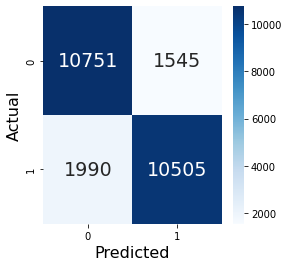


Accuracy:  0.86

F1 Score:  0.86

Report:               precision    recall  f1-score   support

           0       0.84      0.87      0.86     12296
           1       0.87      0.84      0.86     12495

    accuracy                           0.86     24791
   macro avg       0.86      0.86      0.86     24791
weighted avg       0.86      0.86      0.86     24791

CPU times: user 374 ms, sys: 209 ms, total: 583 ms
Wall time: 336 ms


In [98]:
%%time

# Naive Bayes

clf = MultinomialNB()
clf.fit(X_train, y_train)

metrics(clf, X_test, y_test)

In [ ]:
# Naive Bayes on Count Vectors
accuracy = train_model(MultinomialNB(), xtrain_count, y_train, xtest_count)
print("NB, Count Vectors: ", accuracy)

# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(MultinomialNB(), xtrain_tfidf, y_train, xtest_tfidf)
print("NB, WordLevel TF-IDF: ", accuracy)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy = train_model(MultinomialNB(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram)
print("NB, N-Gram Vectors: ", accuracy)

# Naive Bayes on Character Level TF IDF Vectors
accuracy = train_model(MultinomialNB(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars)
print("NB, CharLevel Vectors: ", accuracy)



## **Logistic Regression (cv=6, max_iter=500)**

In [87]:
from sklearn.linear_model import LogisticRegressionCV

In [88]:
%%time

# NOTE: 1m52s on 20210918 at 12:59 (IMDB)

clf = LogisticRegressionCV(cv=6, 
                           scoring='accuracy', 
                           random_state=42, 
                           n_jobs=-1, 
                           verbose=3, 
                           max_iter=500).fit(X_train,y_train)

y_pred = clf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:  1.2min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.9min finished


CPU times: user 2.58 s, sys: 3.88 s, total: 6.47 s
Wall time: 1min 52s


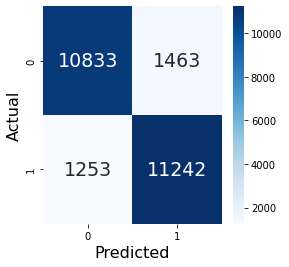


Accuracy:  0.89

F1 Score:  0.89

Report:               precision    recall  f1-score   support

           0       0.90      0.88      0.89     12296
           1       0.88      0.90      0.89     12495

    accuracy                           0.89     24791
   macro avg       0.89      0.89      0.89     24791
weighted avg       0.89      0.89      0.89     24791



In [96]:
get_metrics(clf, X_test, y_test)

## **SGD Classifier**

In [105]:
from sklearn.linear_model import SGDClassifier

In [107]:
clf= SGDClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [106]:
%%time

# NOTE: on 20210918 at 12:59 (IMDB)

clf= SGDClassifier(loss='hinge', 
                   penalty='l2', 
                   alpha=0.0001, 
                   l1_ratio=0.15, 
                   fit_intercept=True,
                   max_iter=1000, 
                   tol=0.001, 
                   shuffle=True, 
                   verbose=0, 
                   epsilon=0.1, 
                   n_jobs=None, 
                   random_state=42, 
                   learning_rate='optimal', 
                   eta0=0.0, 
                   power_t=0.5, 
                   early_stopping=False, 
                   validation_fraction=0.1, 
                   n_iter_no_change=5, 
                   class_weight=None, 
                   warm_start=False, 
                   average=False)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

CPU times: user 263 ms, sys: 301 ms, total: 564 ms
Wall time: 218 ms


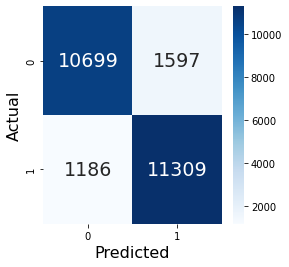


Accuracy:  0.89

F1 Score:  0.89

Report:               precision    recall  f1-score   support

           0       0.90      0.87      0.88     12296
           1       0.88      0.91      0.89     12495

    accuracy                           0.89     24791
   macro avg       0.89      0.89      0.89     24791
weighted avg       0.89      0.89      0.89     24791



In [108]:
get_metrics(clf, X_test, y_test)

In [2]:
pos_tweets = [('I love this car', 'positive'),
    ('This view is amazing', 'positive'),
    ('I feel great this morning', 'positive'),
    ('I am so excited about the concert', 'positive'),
    ('He is my best friend', 'positive')]

neg_tweets = [('I do not like this car', 'negative'),
    ('This view is horrible', 'negative'),
    ('I feel tired this morning', 'negative'),
    ('I am not looking forward to the concert', 'negative'),
    ('He is my enemy', 'negative')]

test_tweets = [
    ('feel happy this morning', 'positive'),
    ('larry is my friend', 'positive'),
    ('I do not like that man', 'negative'),
    ('house is not great', 'negative'),
    ('your song is annoying', 'negative')]


In [3]:
dat = []
for i in pos_tweets+neg_tweets+test_tweets:
    dat.append(i)
    
X = np.array(dat).T[0]
y = np.array(dat).T[1]

In [ ]:
# TfidfVectorizer?

In [4]:
vec = TfidfVectorizer(stop_words='english', ngram_range = (1, 1), lowercase = True)
X_vec = vec.fit_transform(X)
Xtrain = X_vec[:10]
Xtest = X_vec[10:]
ytrain = y[:10]
ytest= y[10:] 

In [5]:
pd.DataFrame(X_vec.toarray(), columns=vec.get_feature_names())

,amazing,annoying,best,car,concert,enemy,excited,feel,forward,friend,great,happy,horrible,house,larry,like,looking,love,man,morning,song,tired,view
0,0.000000,0.000000,0.000000,0.655648,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.755067,0.000000,0.000000,0.000000,0.00000,0.000000
1,0.755067,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.655648
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.554219,0.000000,0.000000,0.621033,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.554219,0.000000,0.00000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.655648,0.0,0.755067,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
4,0.000000,0.000000,0.755067,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.655648,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
5,0.000000,0.000000,0.000000,0.707107,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.755067,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.655648
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.522329,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.522329,0.000000,0.67405,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.523243,0.0,0.000000,0.000000,0.602585,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.602585,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


In [6]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class

model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain.toarray(), ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest.toarray())              # 4. predict on new data
y_model

array(['positive', 'positive', 'negative', 'positive', 'negative'],
      dtype='<U8')

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8

In [8]:
from sklearn.svm import SVC

svc=SVC(kernel='rbf', gamma=1) # 超级参数 
svc.fit(Xtrain.toarray(), ytrain)                  # 3. fit model to data
y_model=svc.predict(Xtest.toarray())
accuracy_score(ytest, y_model)

0.8

In [ ]:
y_model 

In [ ]:
y_model=svc.predict(Xtest.toarray())
y_model

array(['positive', 'positive', 'negative', 'positive', 'negative'],
      dtype='<U39')

In [ ]:
# Don’t be too positive, let’s try another example:

vocabulary = vec.get_feature_names()

def classify_sentiment(str_list, model, vocabulary):
    # str_list = ['a str']
    vec_pred = TfidfVectorizer(stop_words='english', ngram_range = (1, 1), lowercase = True, vocabulary = vocabulary)
    return model.predict(vec_pred.fit_transform(str_list).toarray())

classify_sentiment(['Your song is annoying','larry is horrible'], model, vocabulary)


array(['negative', 'negative'], dtype='<U8')

In [ ]:
classify_sentiment(['I do not like larry', 'larry is my friend'], svc, vocabulary)


array(['negative', 'positive'], dtype='<U39')

作业

- 使用另外一种sklearn的分类器来对tweet_negative2进行情感分析

- 使用https://github.com/victorneo/Twitter-Sentimental-Analysis 所提供的推特数据进行情感分析，可以使用其代码 https://github.com/victorneo/Twitter-Sentimental-Analysis/blob/master/classification.py

- Sentiment Analysis of IMDb movie review Dataset Using Sklearn https://nbviewer.jupyter.org/github/rasbt/python-machine-learning-book/blob/master/code/ch08/ch08.ipynb

## PaddlePaddle
 
<div><img src="https://github.com/chengjun/mybook/blob/main/images/paddlepaddle.png?raw=1" align="right"></div>  飞桨（PaddlePaddle）以百度多年的深度学习技术研究和业务应用为基础，集深度学习核心框架、基础模型库、端到端开发套件、工具组件和服务平台于一体，2016 年正式开源，是全面开源开放、技术领先、功能完备的产业级深度学习平台。 

http://paddlepaddle.org

https://github.com/PaddlePaddle/book/tree/develop/06.understand_sentiment

## Turicreate

https://github.com/apple/turicreate

<div><img src="https://github.com/chengjun/mybook/blob/main/images/turicreate.png?raw=1" align = "right"></div>
Turi Create simplifies the development of custom machine learning models. You don't have to be a machine learning expert to add recommendations, object detection, image classification, image similarity or activity classification to your app.


https://apple.github.io/turicreate/docs/userguide/text_classifier/

https://www.kaggle.com/prakharrathi25/updated-turicreate-sentiment-analysis

![image.png](https://github.com/chengjun/mybook/blob/main/images/end.png?raw=1)

## Creating Sentiment Classifier with Turicreate

In this notebook, I will explain how to develop sentiment analysis classifiers that are based on a bag-of-words model. 
Then, I will demonstrate how these classifiers can be utilized to solve Kaggle's "When Bag of Words Meets Bags of Popcorn" challenge.

Using <del>GraphLab</del> Turicreate it is very easy and straight foward to create a sentiment classifier based on bag-of-words model. Given a dataset stored as a CSV file, you can construct your sentiment classifier using the following code: 

In [14]:
# toy code, do not run it

import turicreate as tc

train_data = tc.SFrame.read_csv(traindata_path,header=True, 
                                delimiter='\t',quote_char='"', 
                                column_type_hints = {'id':str, 
                                                     'sentiment' : int, 
                                                     'review':str } )
train_data['1grams features'] = tc.text_analytics.count_ngrams(
    train_data['review'],1)
train_data['2grams features'] = tc.text_analytics.count_ngrams(
    train_data['review'],2)

cls = tc.classifier.create(train_data, target='sentiment', 
                           features=['1grams features',
                                     '2grams features'])


NameError: ignored

In the rest of this notebook, we will explain this code recipe in details, by demonstrating how this recipe can used to create IMDB movie reviews sentiment classifier.

Before we begin constructing the classifiers, we need to import some Python libraries: turicreate (tc), and IPython display utilities.

In [ ]:
import turicreate as tc
from IPython.display import display
from IPython.display import Image

### IMDB movies reviews Dataset 

> Bag of Words Meets Bags of Popcorn



Throughout this notebook, I will use Kaggle's IMDB movies reviews datasets that is available to download from the following link: https://www.kaggle.com/c/word2vec-nlp-tutorial/data. I downloaded labeledTrainData.tsv and testData.tsv files, and unzipped them to the following local files.

###  DeepLearningMovies

Kaggle's competition for using Google's word2vec package for sentiment analysis

https://github.com/wendykan/DeepLearningMovies

In [ ]:
traindata_path = "/Users/datalab/bigdata/cjc/kaggle_popcorn_data/labeledTrainData.tsv"
testdata_path = "/Users/datalab/bigdata/cjc/kaggle_popcorn_data/testData.tsv"

### Loading Data

We will load the data with IMDB movie reviews to an SFrame using SFrame.read_csv function.

In [ ]:
movies_reviews_data = tc.SFrame.read_csv(traindata_path,header=True, 
                                         delimiter='\t',quote_char='"', 
                                         column_type_hints = {'id':str, 
                                                              'sentiment' : str, 
                                                              'review':str } )

Finished parsing file /Users/datalab/bigdata/cjc/kaggle_popcorn_data/labeledTrainData.tsv

Parsing completed. Parsed 100 lines in 0.318532 secs.

Finished parsing file /Users/datalab/bigdata/cjc/kaggle_popcorn_data/labeledTrainData.tsv

Parsing completed. Parsed 25000 lines in 0.499892 secs.

By using the SFrame show function, we can visualize the data and notice that the train dataset consists of 12,500 positive and 12,500 negative, and overall 24,932 unique reviews.

In [ ]:
movies_reviews_data

id,sentiment,review
5814_8,1,With all this stuff goingdown at the moment with ...
2381_9,1,"""The Classic War of theWorlds"" by Timothy Hines ..."
7759_3,0,The film starts with amanager (Nicholas Bell) ...
3630_4,0,It must be assumed thatthose who praised this ...
9495_8,1,Superbly trashy andwondrously unpretentious ...
8196_8,1,I dont know why peoplethink this is such a bad ...
7166_2,0,"This movie could havebeen very good, but c ..."
10633_1,0,I watched this video at afriend's house. I'm glad ...
319_1,0,"A friend of mine boughtthis film for £1, and ..."
8713_10,1,<br /><br />This movie isfull of references. Like ...


### Constructing Bag-of-Words Classifier 

One of the common techniques to perform document classification (and reviews classification) is using Bag-of-Words model, in which the frequency of each word in the document is used as a feature for training a classifier. GraphLab's text analytics toolkit makes it easy to calculate the frequency of each word in each review. Namely, by using the count_ngrams function with n=1, we can calculate the frequency of each word in each review. By running the following command:

In [ ]:
movies_reviews_data['1grams features'] = tc.text_analytics.count_ngrams(movies_reviews_data ['review'],1)

By running the last command, we created a new column in movies_reviews_data SFrame object. In this column each value is a dictionary object, where each dictionary's keys are the different words which appear in the corresponding review, and the dictionary's values are the frequency of each word.
We can view the values of this new column using the following command.

In [ ]:
movies_reviews_data#[['review','1grams features']]

id,sentiment,review,1grams features
5814_8,1,With all this stuff goingdown at the moment with ...,"{'just': 3, 'sickest': 1,'smooth': 1, 'this': 11, ..."
2381_9,1,"""The Classic War of theWorlds"" by Timothy Hines ...","{'year': 1, 'others': 1,'those': 2, 'this': 1, ..."
7759_3,0,The film starts with amanager (Nicholas Bell) ...,"{'hair': 1, 'bound': 1,'this': 1, 'when': 2, ..."
3630_4,0,It must be assumed thatthose who praised this ...,"{'crocuses': 1, 'that':7, 'batonzilla': 1, ..."
9495_8,1,Superbly trashy andwondrously unpretentious ...,"{'unshaven': 1, 'just':1, 'in': 5, 'when': 2, ..."
8196_8,1,I dont know why peoplethink this is such a bad ...,"{'harry': 3, 'this': 4,'of': 2, 'hurt': 1, ' ..."
7166_2,0,"This movie could havebeen very good, but c ...","{'acting': 1,'background': 1, 'just': ..."
10633_1,0,I watched this video at afriend's house. I'm glad ...,"{'photography': 1,'others': 1, 'zapruder': ..."
319_1,0,"A friend of mine boughtthis film for £1, and ...","{'just': 1, 'this': 2,'when': 1, 'as': 5, 's': ..."
8713_10,1,<br /><br />This movie isfull of references. Like ...,"{'peter': 1, 'ii': 1,'full': 1, 'others': 1, ..."


We are now ready to construct and evaluate the movie reviews sentiment classifier using the calculated above features. But first, to be able to perform a quick evaluation of the constructed classifier, we need to create labeled train and test datasets. We will create train and test datasets by randomly splitting the train dataset into two parts. The first part will contain 80% of the labeled train dataset and will be used as the training dataset, while the second part will contain 20% of the labeled train dataset and will be used as the testing dataset. We will create these two dataset by using the following command:  

In [ ]:
train_set, test_set = movies_reviews_data.random_split(0.8, seed=5)

We are now ready to create a classifier using the following command:

In [ ]:
model_1 = tc.classifier.create(train_set, target='sentiment', \
                               features=['1grams features'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: LogisticClassifier, SVMClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Logistic regression:

--------------------------------------------------------

Number of examples          : 19077

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 68246

Number of coefficients      : 68247

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 1.111660     | 0.942182          | 0.860697            |

| 1         | 4        | 1.000000  | 1.253890     | 0.968444          | 0.865672            |

| 2         | 6        | 1.000000  | 1.390344     | 0.990040          | 0.897512            |

| 3         | 7        | 1.000000  | 1.474481     | 0.992923          | 0.899502            |

| 4         | 8        | 1.000000  | 1.563669     | 0.997379          | 0.891542            |

| 9         | 13       | 1.000000  | 2.052863     | 1.000000          | 0.867662            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 19077

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 68246

Number of coefficients    : 68247

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 0.125585     | 0.942182          | 0.860697            |

| 1         | 4        | 1.000000  | 0.268260     | 0.973738          | 0.875622            |

| 2         | 5        | 1.000000  | 0.348993     | 0.989411          | 0.881592            |

| 3         | 6        | 1.000000  | 0.433099     | 0.992976          | 0.884577            |

| 4         | 7        | 1.000000  | 0.519594     | 0.996016          | 0.881592            |

| 9         | 12       | 1.000000  | 0.923521     | 0.999685          | 0.886567            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: LogisticClassifier              : 0.8676616915422886
PROGRESS: SVMClassifier                   : 0.8865671641791045
PROGRESS: ---------------------------------------------
PROGRESS: Selecting SVMClassifier based on validation set performance.


We can evaluate the performence of the classifier by evaluating it on the test dataset

In [ ]:
result1 = model_1.evaluate(test_set)

In order to get an easy view of the classifier's prediction result, we define and use the following function

In [ ]:
def print_statistics(result):
    print( "*" * 30)
    print( "Accuracy        : ", result["accuracy"])
    print( "Confusion Matrix: \n", result["confusion_matrix"])
print_statistics(result1)

******************************
Accuracy        :  0.8710858072387149
Confusion Matrix: 
 +--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|      0       |        1        |  374  |
|      1       |        0        |  260  |
|      1       |        1        |  2133 |
|      0       |        0        |  2151 |
+--------------+-----------------+-------+
[4 rows x 3 columns]



As can be seen in the results above, in just a few relatively straight foward lines of code, we have developed a sentiment classifier that has accuracy of about ~0.88. Next, we demonstrate how we can improve the classifier accuracy even more.

### Improving The Classifier

One way to improve the movie reviews sentiment classifier is to extract more meaningful features from the reviews. One method to add additional features, which might be meaningful, is to calculate the frequency of every two consecutive words in each review. To calculate the frequency of each two consecutive words in each review, as before, we will use turicreate's count_ngrams function only this time we will set n to be equal 2 (n=2) to create new column named '2grams features'.  

In [ ]:
movies_reviews_data['2grams features'] = tc.text_analytics.count_ngrams(movies_reviews_data['review'],2)

In [ ]:
movies_reviews_data

id,sentiment,review,1grams features,2grams features
5814_8,1,With all this stuff goingdown at the moment with ...,"{'just': 3, 'sickest': 1,'smooth': 1, 'this': 11, ...","{'alone a': 1, 'mostpeople': 1, 'hope he' ..."
2381_9,1,"""The Classic War of theWorlds"" by Timothy Hines ...","{'year': 1, 'others': 1,'those': 2, 'this': 1, ...","{'slightest resemblance':1, 'which is': 1, 'very ..."
7759_3,0,The film starts with amanager (Nicholas Bell) ...,"{'hair': 1, 'bound': 1,'this': 1, 'when': 2, ...","{'quite boring': 1,'packs a': 1, 'small ..."
3630_4,0,It must be assumed thatthose who praised this ...,"{'crocuses': 1, 'that':7, 'batonzilla': 1, ...","{'but i': 1, 'isrepresented': 1, 'opera ..."
9495_8,1,Superbly trashy andwondrously unpretentious ...,"{'unshaven': 1, 'just':1, 'in': 5, 'when': 2, ...","{'unpretentious 80': 1,'sleazy black': 1, 'd ..."
8196_8,1,I dont know why peoplethink this is such a bad ...,"{'harry': 3, 'this': 4,'of': 2, 'hurt': 1, ' ...","{'like that': 1, 'seethis': 1, 'is such': 1, ..."
7166_2,0,"This movie could havebeen very good, but c ...","{'acting': 1,'background': 1, 'just': ...","{'linked to': 1, 'wayshort': 1, 'good but' ..."
10633_1,0,I watched this video at afriend's house. I'm glad ...,"{'photography': 1,'others': 1, 'zapruder': ...","{'curiously ends': 1,'several clips': 1, ..."
319_1,0,"A friend of mine boughtthis film for £1, and ...","{'just': 1, 'this': 2,'when': 1, 'as': 5, 's': ...","{'bob thornton': 1, 'inthe': 1, 'taking a': 1, ..."
8713_10,1,<br /><br />This movie isfull of references. Like ...,"{'peter': 1, 'ii': 1,'full': 1, 'others': 1, ...","{'in the': 1, 'is a': 1,'lorre this': 1, 'much ..."


As before, we will construct and evaluate a movie reviews sentiment classifier. However, this time we will use both the '1grams features' and the '2grams features' features

In [ ]:
train_set, test_set = movies_reviews_data.random_split(0.8, seed=5)
model_2 = tc.classifier.create(train_set, target='sentiment', features=['1grams features','2grams features'])
result2 = model_2.evaluate(test_set)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: LogisticClassifier, SVMClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Logistic regression:

--------------------------------------------------------

Number of examples          : 19077

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 1206694

Number of coefficients      : 1206695

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 0.500000  | 0.884358     | 0.999266          | 0.866667            |

| 1         | 5        | 0.500000  | 1.542838     | 0.999948          | 0.866667            |

| 2         | 6        | 0.625000  | 1.909261     | 1.000000          | 0.865672            |

| 3         | 8        | 0.625000  | 2.436618     | 1.000000          | 0.864677            |

| 4         | 10       | 0.625000  | 2.971373     | 1.000000          | 0.863682            |

| 9         | 18       | 0.976563  | 5.228981     | 1.000000          | 0.862687            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 19077

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 1206694

Number of coefficients    : 1206695

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 0.710178     | 0.999266          | 0.866667            |

| 1         | 4        | 1.000000  | 1.227603     | 1.000000          | 0.865672            |

| 2         | 5        | 1.000000  | 1.524246     | 1.000000          | 0.865672            |

| 3         | 6        | 1.000000  | 1.824261     | 1.000000          | 0.865672            |

| 4         | 13       | 0.001263  | 3.080125     | 1.000000          | 0.865672            |

| 9         | 26       | 0.262737  | 6.006328     | 1.000000          | 0.865672            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: LogisticClassifier              : 0.8626865671641791
PROGRESS: SVMClassifier                   : 0.8656716417910447
PROGRESS: ---------------------------------------------
PROGRESS: Selecting SVMClassifier based on validation set performance.


In [ ]:
print_statistics(result2)

******************************
Accuracy        :  0.8816592110614071
Confusion Matrix: 
 +--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|      0       |        1        |  343  |
|      1       |        0        |  239  |
|      1       |        1        |  2154 |
|      0       |        0        |  2182 |
+--------------+-----------------+-------+
[4 rows x 3 columns]



Indeed, the new constructed classifier seems to be more accurate with an accuracy of about ~0.9.

### Unlabeled Test File

To test how well the presented method works, we will use all the 25,000 labeled IMDB movie reviews in the train dataset to construct a classifier. Afterwards, we will utilize the constructed classifier to predict sentiment for each review in the unlabeled dataset. Lastly, we will create a submission file according to Kaggle's guidelines and submit it. 

In [ ]:
traindata_path = "/Users/datalab/bigdata/cjc/kaggle_popcorn_data/labeledTrainData.tsv"
testdata_path = "/Users/datalab/bigdata/cjc/kaggle_popcorn_data/testData.tsv"
#creating classifier using all 25,000 reviews
train_data = tc.SFrame.read_csv(traindata_path,header=True, delimiter='\t',quote_char='"', 
                                column_type_hints = {'id':str, 'sentiment' : int, 'review':str } )
train_data['1grams features'] = tc.text_analytics.count_ngrams(train_data['review'],1)
train_data['2grams features'] = tc.text_analytics.count_ngrams(train_data['review'],2)

cls = tc.classifier.create(train_data, target='sentiment', features=['1grams features','2grams features'])
#creating the test dataset
test_data = tc.SFrame.read_csv(testdata_path,header=True, delimiter='\t',quote_char='"', 
                               column_type_hints = {'id':str, 'review':str } )
test_data['1grams features'] = tc.text_analytics.count_ngrams(test_data['review'],1)
test_data['2grams features'] = tc.text_analytics.count_ngrams(test_data['review'],2)

#predicting the sentiment of each review in the test dataset
test_data['sentiment'] = cls.classify(test_data)['class'].astype(int)

#saving the prediction to a CSV for submission
test_data[['id','sentiment']].save("/Users/datalab/bigdata/cjc/kaggle_popcorn_data/predictions.csv", format="csv")

Finished parsing file /Users/datalab/bigdata/cjc/kaggle_popcorn_data/labeledTrainData.tsv

Parsing completed. Parsed 100 lines in 0.282738 secs.

Finished parsing file /Users/datalab/bigdata/cjc/kaggle_popcorn_data/labeledTrainData.tsv

Parsing completed. Parsed 25000 lines in 0.507212 secs.

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: LogisticClassifier, SVMClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Logistic regression:

--------------------------------------------------------

Number of examples          : 23750

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 1407914

Number of coefficients      : 1407915

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 0.772874     | 0.998821          | 0.896000            |

| 1         | 4        | 1.000000  | 1.443709     | 0.999916          | 0.894400            |

| 2         | 6        | 0.648072  | 2.077022     | 0.999958          | 0.895200            |

| 3         | 8        | 0.648072  | 2.769055     | 0.999958          | 0.894400            |

| 4         | 10       | 0.648072  | 3.420360     | 0.999958          | 0.894400            |

| 9         | 22       | 0.486054  | 6.816458     | 1.000000          | 0.892800            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 23750

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 1407914

Number of coefficients    : 1407915

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 0.724382     | 0.998821          | 0.896000            |

| 1         | 4        | 1.000000  | 1.284643     | 0.999916          | 0.896000            |

| 2         | 5        | 1.000000  | 1.634216     | 0.999958          | 0.896000            |

| 3         | 6        | 1.000000  | 2.002875     | 0.999958          | 0.896000            |

| 4         | 13       | 0.000338  | 3.462338     | 1.000000          | 0.895200            |

| 9         | 38       | 4.080042  | 9.019969     | 1.000000          | 0.895200            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: LogisticClassifier              : 0.8928
PROGRESS: SVMClassifier                   : 0.8952
PROGRESS: ---------------------------------------------
PROGRESS: Selecting SVMClassifier based on validation set performance.


Finished parsing file /Users/datalab/bigdata/cjc/kaggle_popcorn_data/testData.tsv

Parsing completed. Parsed 100 lines in 0.313905 secs.

Finished parsing file /Users/datalab/bigdata/cjc/kaggle_popcorn_data/testData.tsv

Parsing completed. Parsed 25000 lines in 0.560208 secs.

We then submitted the predictions.csv file to the Kaggle challange website and scored AUC of about 0.88.

### Further Readings

Further reading materials can be found in the following links:

http://en.wikipedia.org/wiki/Bag-of-words_model

https://dato.com/products/create/docs/generated/graphlab.SFrame.html

https://dato.com/products/create/docs/graphlab.toolkits.classifier.html

https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-1-for-beginners-bag-of-words

Andrew L. Maas, Raymond E. Daly, Peter T. Pham, Dan Huang, Andrew Y. Ng, and Christopher Potts. (2011). "Learning Word Vectors for Sentiment Analysis." The 49th Annual Meeting of the Association for Computational Linguistics (ACL 2011).
